In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

%matplotlib inline

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_model(model, dataloaders, phase='test', num_images=6, device=None):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    class_names = dataloaders[phase].dataset.get_inv_classmap()
    class_map = dataloaders[phase].dataset.class_map

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders[phase]):
            if device:
                inputs = inputs.to(device)
                labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                if preds[j] == labels[j]:
                    color = 'green'
                else:
                    color = 'red'
                ax.set_title('predicted: {}, actual: {}'.
                             format(class_names[preds[j].item()],
                                    class_names[labels[j].item()]),
                            color=color)
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [3]:
from src.train import *

processor, trainer_ft, dataloaders_ft = setup_ft(batch_size=1)

INFO:fashion:Preprocessing data
INFO:fashion:Cleaning csv
INFO:fashion:Reading clean csv into df
INFO:fashion:Splitting into test-train
INFO:fashion:Sub-splitting based on top-20 classes
INFO:fashion:Creating datasets
INFO:fashion:Created train dataset with 4629 samples
INFO:fashion:Created val dataset with 1158 samples
INFO:fashion:Created test dataset with 5505 samples
INFO:fashion:Creating dataloaders
INFO:fashion:Creating model
INFO:fashion:Creating trainer


In [7]:
processor, trainer_ft, dataloaders_ft = setup_ft(processor=processor, batch_size=1)

INFO:fashion:Creating datasets
INFO:fashion:Created train dataset with 4629 samples
INFO:fashion:Created val dataset with 1158 samples
INFO:fashion:Created test dataset with 5505 samples
INFO:fashion:Creating dataloaders
INFO:fashion:Creating model
INFO:fashion:Creating trainer


In [8]:
checkpoint = torch.load('ckpts/best_val_ft.ckpt', map_location=torch.device('cpu'))
trainer_ft.model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

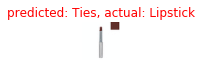

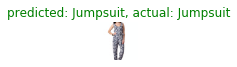

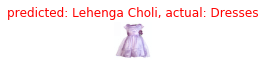

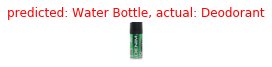

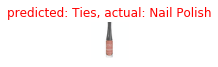

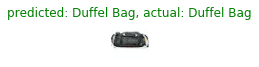

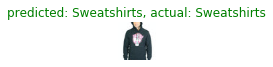

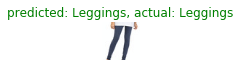

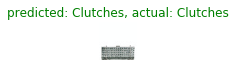

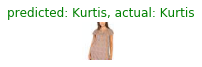

In [12]:
visualize_model(trainer_ft.model, dataloaders_ft, num_images=10)

In [43]:
from collections import Counter

freqs = Counter(dataloaders_ft['test'].dataset.label_arr)

In [54]:
class_map = dataloaders_ft['test'].dataset.class_map
mapped_keys = [class_map[x] for x in freqs.keys()]
values = list(freqs.values())

print(len(values), len(mapped_keys))

102 102


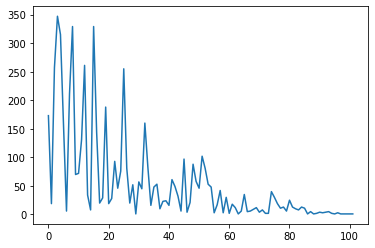

In [60]:
plt.plot(values)